# **Homework 2 - Simplified Object Detection**

<div style="border: 3px solid #222; padding: 16px; border-radius: 10px; background-color: #1c1f26; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #e0e0e0;">
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 12px;">
    <span style="font-size: 24px; color: #ff5555;">&#128274;</span>
    <span style="font-size: 16px;"><strong>Project:</strong> Homeworks</span>
  </div>
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 8px;">
    <span style="font-size: 20px; color: #ff5555;">&#128218;</span>
    <span style="font-size: 16px;"><strong>Course:</strong> Deep Network Development</span>
  </div>
  <div style="margin-top: 12px; font-size: 14px;">
    <span style="font-size: 18px; color: #6e8192;">&#128100;</span>
    <span style="font-weight: bold;"><strong>Authors:</strong></span> Tamás Takács, Imre Molnár (PhD students, Department of Artificial Intelligence, Eötvös Loránd University)
  </div>
</div>
<hr style="border: none; border-top: 2px solid #444;">
<br>

<img src="https://miro.medium.com/v2/resize:fit:1400/1*hrXwIJgw51P6p1xJh_IK-g.png" alt="1" border="0">


This notebook contains the required task for the **second homework** of the **Deep Network Development (DNDEG)** course. Read the task description carefully and **fill in the empty code cells**.


# **Task Description**

You are required to **create and train a custom object detection model** to solve a simplified object detection task. Additionally, you will implement the same task using a **pre-trained YOLO model**.  

To achieve this, you will first **generate a synthetic dataset** by placing a specific object onto a set of background images. This dataset will be used for training both models. Since this is a **simplified object detection problem**, each image should contain **only a single object**, ensuring a controlled training environment.  

Your goal is to **train a custom object detection model from scratch** and later **fine-tune a pre-trained YOLO model** using the same dataset.

## **Expectations**

- While **high performance is not expected**, your model should **perform better than random guessing**, and the **loss should consistently decrease across epochs**.  

- You should structure your dataset using the **YOLO format for bounding box regression** (`<class_id> <x_center> <y_center> <width> <height>`), where:

  - `<class_id>` is the object class label (an integer starting from 0).
  - `<x_center>` and `<y_center>` are the normalized coordinates (values between 0 and 1) of the bounding box center.
  - `<width>` and `<height>` are the normalized dimensions (values between 0 and 1) of the bounding box relative to the image size.

ensuring that the same dataset can be seamlessly used for fine-tuning a **pre-trained YOLO model**.

- Your evaluation should include key metrics such as **precision, recall, F1-score, mAP (mean average precision), and IoU (Intersection over Union)**, along with monitoring the overall loss trends throughout training. These metrics should be **visualized using plots and graphs** (e.g., with **matplotlib** or **seaborn**) to illustrate performance over time.  

- To prevent overfitting, you should implement techniques such as **Early Stopping** and ensure that the **best-performing model is saved** during training.  

- For better experiment tracking and visualization, consider using **WandB (Weights and Biases)** or **TensorBoard** to log training progress, performance metrics, and model improvements in real time.  
  
## **Requirements**

You will be required to choose at least three different objects that you would like to run object detection on. For the background images, you are free to use anything thematic and download images utilizing a web crawler. A simple example could be `Waldo`, `Wilma`, and `Wenda`, with the background images being *Where's Waldo?* doodles.

- Data Visualization:
  - Display **your chosen objects with the background removed**.
  - Display **a few of your background images**.
  - Visualize the **synthetic dataset**, where each image should contain a background with an object placed onto it, along with a bounding box and class label.

- Performance Monitoring:
  - **Visualize training and validation losses** (classification loss, regression loss) after training the network.
  - Use **plots and metrics** (e.g., matplotlib, seaborn) to display performance trends.

- Implement overfitting prevention techniques, such as:
  - **Early stopping**
  - **Regularization techniques** (e.g., dropout, weight decay)
  - **Experimenting with different loss functions**
  - Save the **best-performing model** during training.

- Evaluate model performance:
  - **Visualize predictions** on a batch of test images.
  - Calculate **precision, recall, F1-score, mAP, and IoU** for the test dataset.

- Fine-Tuning YOLO:
  - Fine-tune a **YOLO nano** model (**version 5 or later**) on your object detection task.
  - Evaluate model performance using the **same metrics** as before.

- Optionally, use WandB (Weights and Biases) or TensorBoard to:
  - Track and visualize **training progress**.
  - Monitor **model performance** over time.
  - Log **key metrics**.


> **NOTE:** A **multi-shot object detector is unnecessary** since you are dealing with **single-object detection**, for which a simple bounding box regression and classification head will suffice. Implementing `Non-Maximum Suppression` is also **not required** due to the single-object constraint. If you're feeling adventurous, you could extend this homework to multi-object detection using a single-shot approach for a **+1 improvement to your grade**!

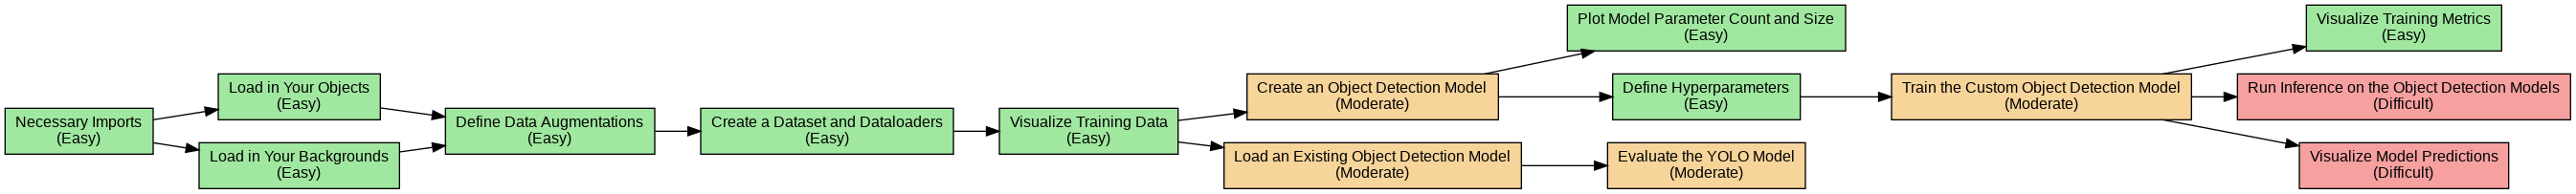

In [ ]:
# @title Custom Object Detection Tasks
# %%capture flowchart_output
# HIDDEN CELL
from graphviz import Digraph
from IPython.display import Image as IMG

def create_flowchart(output_filename='flowchart'):
    dot = Digraph(name='Simplified Object Detection', format='png')
    dot.attr(rankdir='LR')
    dot.attr('node', shape='box', style='filled', fontsize='12', fontname='Arial')

    dot.node('Imports', 'Necessary Imports\n(Easy)', fillcolor='#A0E7A0')

    dot.node('LoadObjects', 'Load in Your Objects\n(Easy)', fillcolor='#A0E7A0')
    dot.node('LoadBackgrounds', 'Load in Your Backgrounds\n(Easy)', fillcolor='#A0E7A0')

    dot.node('AugmentData', 'Define Data Augmentations\n(Easy)', fillcolor='#A0E7A0')
    dot.node('DatasetDataloader', 'Create a Dataset and Dataloaders\n(Easy)', fillcolor='#A0E7A0')

    dot.node('VisualizeSample', 'Visualize Training Data\n(Easy)', fillcolor='#A0E7A0')

    dot.node('CreateModel', 'Create an Object Detection Model\n(Moderate)', fillcolor='#F6D49A')

    dot.node('TorchSummary', 'Plot Model Parameter Count and Size\n(Easy)', fillcolor='#A0E7A0')
    dot.node('Hyperparameters', 'Define Hyperparameters\n(Easy)', fillcolor='#A0E7A0')

    dot.node('TrainModel', 'Train the Custom Object Detection Model\n(Moderate)', fillcolor='#F6D49A')

    dot.node('VisualizeTrain', 'Visualize Training Metrics\n(Easy)', fillcolor='#A0E7A0')
    dot.node('RunInference', 'Run Inference on the Object Detection Models\n(Difficult)', fillcolor='#F6A0A0')
    dot.node('VisPred', 'Visualize Model Predictions\n(Difficult)', fillcolor='#F6A0A0')


    dot.node('LoadYOLO', 'Load an Existing Object Detection Model\n(Moderate)', fillcolor='#F6D49A')

    dot.node('EvalYOLO', 'Evaluate the YOLO Model\n(Moderate)', fillcolor='#F6D49A')

    # Edges
    dot.edge('Imports', 'LoadObjects')
    dot.edge('Imports', 'LoadBackgrounds')

    dot.edge('LoadObjects', 'AugmentData')
    dot.edge('LoadBackgrounds', 'AugmentData')

    dot.edge('AugmentData', 'DatasetDataloader')

    dot.edge('DatasetDataloader', 'VisualizeSample')

    dot.edge('VisualizeSample', 'CreateModel')

    dot.edge('CreateModel', 'TorchSummary')
    dot.edge('CreateModel', 'Hyperparameters')

    dot.edge('Hyperparameters', 'TrainModel')

    dot.edge('TrainModel', 'VisualizeTrain')
    dot.edge('TrainModel', 'RunInference')
    dot.edge('TrainModel', 'VisPred')

    dot.edge('VisualizeSample', 'LoadYOLO')
    dot.edge('LoadYOLO', 'EvalYOLO')

    dot.render(output_filename, view=False)

create_flowchart('homework2_flowchart')
IMG('homework2_flowchart.png')

Each section of the Notebook will guide you through the task:
- `necessary imports`
- `loading in chosen objects`
- `crawling the web for background images`
- `creating a synthetic dataset`
- `creating dataloaders`
- `visualizing the training data`
- `creating a custom model for object detection`
- `defining a loss function and an optimizer`
- `training and validating the custom model`
- `testing the custom model`
- `fine-tuning a YOLO model`
- `evaluating YOLO results`

The sections are there to guide you but you **do not have to follow them strictly**.

Copy this notebook to your drive (`File -> Save a copy in Drive`), edit it, and upload the final `.ipynb` file to [Canvas](https://canvas.elte.hu). If you are using this in **Google Colab**, save it as `.ipynb` and upload it, or share the public link. If you have your own machine with Jupyter installed, you can work there as well, as long as you save and upload the `.ipynb` file.

## **General Rules**
Please check all the requirements listed on **Canvas**, but here are some general rules:

- **No NSFW, inappropriate, offensive, or negative images**. Be creative or use your hobbies as inspiration.
- The model is **not expected to achieve high performance** but must perform better than random guessing.
- Copying others' code will make you fail the assignment automatically, resulting in a **0**.
- Not submitting anything results in a **0**.
- Submitting something, as long as it is not an empty notebook, might result in a 1.
- **Deadline is November 4th Tuesday 11:59 PM** (strict, no late submission)
- Feel free to add more code cells as needed. But don't put code into external Python files.
- Please add your `name` and `Neptun ID` below.

`Good luck!`

## **Guidelines**
Please carefully read each cell of the notebook, as they contain guidelines to help you complete the assignments. While you don't have to follow them strictly, we believe that they provide enough help.

**Name:**  Rihem Ben Abdallah

**Neptun ID:** U3HVZT


## **0. Necessary Imports**
Import all the necessary packages for this assignment. **ONLY PYTORCH MODELS ARE ACCEPTED!**

In [ ]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from PIL import Image
import random
import torchvision.models as models
from torchsummary import summary
import torch.optim as optim
from tqdm import tqdm

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

## **1.1 Object Loading Process**

For this assignment you might choose 3 of the [Where's Wally Characters](https://waldo.fandom.com/wiki/Category:Characters).


<img src='https://kotaksuratriza.wordpress.com/wp-content/uploads/2012/06/wally-and-friends.jpg' />

**Please select 3 or more objects.** After selecting the objects, **remove the background, keeping only the object itself**. You can do this manually, online, or by using code (this step is not part of the assignment evaluation).

As an example, the following objects were chosen (with the background removed using the Segment Anything Model). **Make sure to visualize all of your objects** with `Matplotlib` or `Seaborn`!

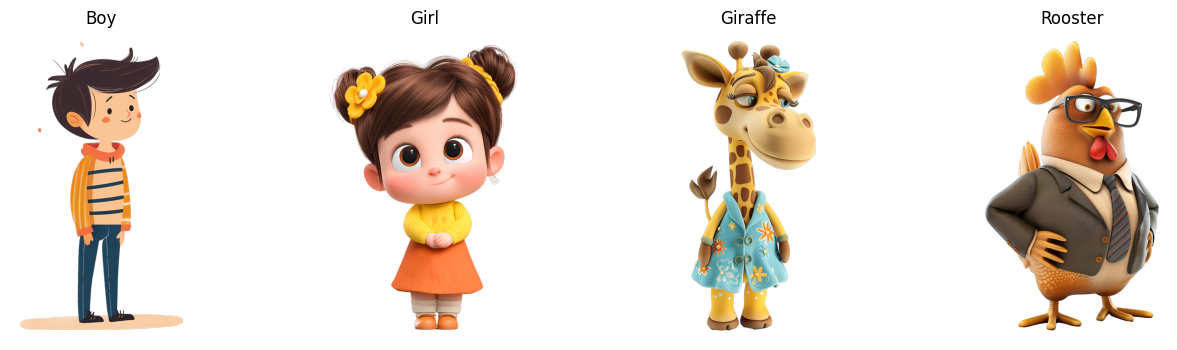

In [ ]:
# Step 1 : Loading images with a transparent Background
object1 = Image.open("/content/boy.png")
object2 = Image.open("/content/girl.png")
object3 = Image.open("/content/giraffe.png")
object4 = Image.open("/content/rooster.png")

# normalization
objects = [object1, object2, object3, object4]
objects_normalized = [np.array(obj)/255.0 for obj in objects]

# Visualization
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
titles = ["Boy", "Girl", "Giraffe", "Rooster"]

for i, obj in enumerate(objects_normalized):
    axes[i].imshow(obj)
    axes[i].set_title(titles[i])
    axes[i].axis("off")

plt.show()


## **1.2 Crawling the Web for Background Images**

To train a custom object detection model, a dataset is required. For this assignment, you will create a **synthetic dataset** by:  

- **Placing a single object at a random position** on a background image.  

The goal is to follow a similar approach to **Where’s Waldo doodles** by embedding objects into cluttered backgrounds. **Therefore, gather a selection of background images from various doodles.** This can be done manually or programmatically.  

To automate image collection, it is recommended to use `icrawler`. [Documentation](https://icrawler.readthedocs.io/en/latest/)

In [ ]:
!pip install icrawler

In [ ]:
!mkdir background

In case of any **errors, try using a different crawler**. You can use one of the following options:

```python
from icrawler.builtin import BaiduImageCrawler, BingImageCrawler, GoogleImageCrawler


In [ ]:
from icrawler.builtin import GoogleImageCrawler

google_crawler = GoogleImageCrawler(
    parser_threads=2,
    downloader_threads=4,
    storage={'root_dir': 'background'}
)

for keyword in ['doodle background', 'cluttered doodle background', 'colorful doodle backgroun', 'waldo doodle background']:
    google_crawler.crawl(
        keyword=keyword, max_num=100, file_idx_offset='auto')

# Some images may return an error, but icrawler tries to find other images regardless

ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/012/826/456/non_2x/cute-abstract-doodle-artistic-sketch-seamless-pattern-background-with-crazy-messy-doodle-art-with-different-shapes-curls-fantasy-texture-textile-wrap-fabric-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/012/826/451/non_2x/cute-abstract-doodle-artistic-sketch-seamless-pattern-background-with-crazy-messy-doodle-art-with-different-shapes-curls-fantasy-texture-textile-wrap-fabric-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/011/302/751/non_2x/cute-abstract-doodle-artistic-sketch-seamless-pattern-background-with-crazy-messy-doodle-art-with-different-shapes-curls-vector.jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/629771122/vector/home-stuff-messy-and-chaotic-room-of-artistic-person.jpg
ERROR:download

Make sure to **visualize a small subset of the background images as well**!
```python
def display_sample_images(directory):
  raise NotImplementedError
```

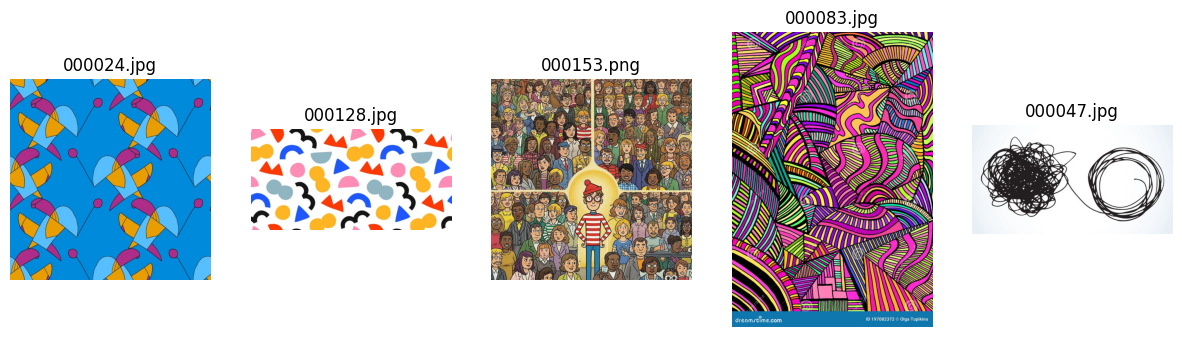

In [ ]:
# Visualize random crawled background images

def display_sample_images(directory, num_images=5):

    # List all images in the Background dir
    image_files = [f for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # selecting a random sample of images to display
    sample_files = random.sample(image_files, min(num_images, len(image_files)))

    # Visualization
    fig, axes = plt.subplots(1, len(sample_files), figsize=(15, 5))
    if len(sample_files) == 1:
        axes = [axes]
    for ax, file in zip(axes, sample_files):
        img_path = os.path.join(directory, file)
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(file)
        ax.axis('off')
    plt.show()


display_sample_images("background", num_images=5)


## **2. Creating a Synthetic Dataset**

This is a crucial part of the assignment evaluation. Using the selected objects and collected background images, follow these steps to generate your dataset:  

1. **Randomly select background images** from your dataset.  
2. **Place a single object** from your selected set into each background image at a **random location**.  
3. **Record the object's coordinates** and create a corresponding bounding box. The format should be:  
   - If an object with height $h$ and width $w$ is positioned at $(x, y)$, the bounding box should follow:  
     $$ [x_{\text{center}}, y_{\text{center}}, \text{width}, \text{height}] $$  
   - Normalize the values using:  
     $$ \left[\frac{x + w/2}{\text{image width}}, \frac{y + h/2}{\text{image height}}, \frac{w}{\text{image width}}, \frac{h}{\text{image height}}\right] $$  
     where *image* refers to the background image dimensions.  
4. **Save the generated dataset**, as it will be used for training both your custom model and fine-tuning an existing object detection model.  
5. **Wrap the dataset creation** within a PyTorch `Dataset` class for seamless data handling and model training.  
6. **Split the dataset** into training, validation, and test sets to ensure proper model evaluation.
7. **Apply various transformations** on the training and validation datasets. Only apply **tensor conversion and normalization** on the test set.

<img src="https://i.ibb.co/XrHqLmz4/2.png" alt="2" border="0">

```python
def createDataset(root_dir, dataset_name, split, img_size, num_images):
    #This my own function... It creates and saves a dataset in the following format:
    # root/
    #     dataset/
    #             train/
    #                   images/
    #                         00001.jpg
    #                   labels/
    #                         00001.txt with the content [class yolo_x, yolo_y, yolo_w, yolo_h] following the yolo format
    #             val
    #...
    # ADD YOUR CODE HERE
    raise NotImplementedError

createDataset('dataset', 'background', split='train', img_size=(640,640), num_images=5000)
createDataset('dataset', 'background', split='val', img_size=(640,640), num_images=1000)
createDataset('dataset', 'background', split='test', img_size=(640,640), num_images=200)
```

```python
class ObjectDetectionDataset(Dataset):
    def __init__(self, root_dir, split, num_classes, transform):
        raise NotImplementedError
    def __len__(self):
        raise NotImplementedError
    def __getitem__(self, idx):
        raise NotImplementedError
```

In [ ]:
train_transform = transforms.Compose([
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Create a Synthetic Dataset

# 1/ Create object detection class

object_paths = ['/content/boy.png', '/content/girl.png', '/content/giraffe.png', '/content/rooster.png']
objects = [Image.open(p) for p in object_paths]

def createDataset(root_dir, dataset_name, split, img_size, num_images):
    """
    Creates a synthetic object detection dataset in YOLO format.
    """

    images_dir = os.path.join(root_dir, split, 'images')
    labels_dir = os.path.join(root_dir, split, 'labels')
    os.makedirs(images_dir, exist_ok=True)
    os.makedirs(labels_dir, exist_ok=True)

    # List all background images
    bg_files = [f for f in os.listdir(dataset_name) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for i in range(1, num_images + 1):
        while True:
            try:
                # Randomly choose background and object
                bg_file = random.choice(bg_files)
                obj = random.choice(objects)

                # Load and resize background
                bg = Image.open(os.path.join(dataset_name, bg_file)).convert("RGB")
                bg = bg.resize(img_size)
                bg_width, bg_height = bg.size

                # Resize object
                scale = random.uniform(0.2, 0.3)
                obj_width, obj_height = obj.size
                new_width = int(bg_width * scale)
                new_height = int(obj_height * new_width / obj_width)
                obj_resized = obj.resize((new_width, new_height))

                # Random position
                x_min = random.randint(0, bg_width - new_width)
                y_min = random.randint(0, bg_height - new_height)

                # Paste object onto background
                bg_copy = bg.copy()
                bg_copy.paste(obj_resized, (x_min, y_min), obj_resized)

                # Save image
                img_filename = f"{i:05d}.jpg"
                bg_copy.save(os.path.join(images_dir, img_filename))

                # YOLO label
                x_center = (x_min + new_width / 2) / bg_width
                y_center = (y_min + new_height / 2) / bg_height
                bbox_width = new_width / bg_width
                bbox_height = new_height / bg_height
                class_id = objects.index(obj)

                label_filename = f"{i:05d}.txt"
                with open(os.path.join(labels_dir, label_filename), 'w') as f:
                    f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}\n")

                break

            except (OSError, ValueError) as e:
                print(f"Skipping corrupted background image: {bg_file}, error: {e}")
                continue

    print(f"{split} dataset created with {num_images} images.")


createDataset('dataset', 'background', split='train', img_size=(640,640), num_images=5000)
createDataset('dataset', 'background', split='val', img_size=(640,640), num_images=1000)
createDataset('dataset', 'background', split='test', img_size=(640,640), num_images=200)


# 2/ Create ObjectDetectionDataset Implementation

class ObjectDetectionDataset(Dataset):
    def __init__(self, root_dir, split, num_classes, transform=None):
        self.images_dir = os.path.join(root_dir, split, 'images')
        self.labels_dir = os.path.join(root_dir, split, 'labels')
        self.image_files = sorted([f for f in os.listdir(self.images_dir) if f.endswith('.jpg')])
        self.num_classes = num_classes


        if transform is None:
            self.transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ])
        else:
            self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Load image
        img_path = os.path.join(self.images_dir, self.image_files[idx])
        image = Image.open(img_path).convert("RGB")

        # Load YOLO label
        label_path = os.path.join(self.labels_dir, self.image_files[idx].replace('.jpg', '.txt'))
        target = torch.zeros(5)  # default: [class_id, x_center, y_center, width, height]
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                line = f.readline().strip()
                if line:
                    parts = line.split()
                    class_id = int(parts[0])
                    bbox = [float(x) for x in parts[1:]]
                    target = torch.tensor([class_id] + bbox, dtype=torch.float32)

        # Apply transforms
        image = self.transform(image)

        return image, target




train dataset created with 5000 images.
val dataset created with 1000 images.
test dataset created with 200 images.


## **3. Creating Dataloaders**

For the **DataLoader**, ensure that the **batch size** is appropriate so that it fits into memory. Set the **`shuffle`** parameter as follows:

- **Training & Validation DataLoaders:** `shuffle=True` (to randomize the order of samples)  
- **Test DataLoader:** `shuffle=False` (to maintain consistency in evaluation)

In [ ]:
# Creating data Loaders

root_dir = 'dataset'
batch_size = 16
num_classes = 4

# Create datasets
train_dataset = ObjectDetectionDataset(root_dir=root_dir, split='train', num_classes=num_classes)
val_dataset   = ObjectDetectionDataset(root_dir=root_dir, split='val', num_classes=num_classes)
test_dataset  = ObjectDetectionDataset(root_dir=root_dir, split='test', num_classes=num_classes)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)


images, targets = next(iter(train_loader))
print(f"Image batch shape: {images.shape}")


Image batch shape: torch.Size([16, 3, 640, 640])


## **4. Visualizing the Training Data**

To visualize the training data, extract a batch from the training `DataLoader` and plot the **input images with their respective bounding box and class label** using `Matplotlib` or `Seaborn`. Ensure that at least **8 datapoints** are displayed for a clear representation.

```python
def visualize_batch():
  raise NotImplementedError
```

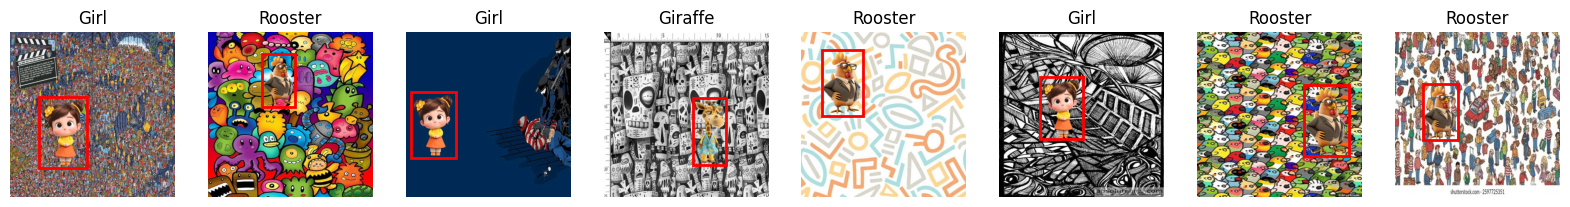

In [ ]:
# Visualize training data


class_names = ['Boy', 'Girl', 'Giraffe', 'Rooster']

def visualize_batch(loader, num_images=8):
    images, targets = next(iter(loader))
    images = images[:num_images]
    targets = targets[:num_images]
    batch_size = images.shape[0]
    H, W = images.shape[2], images.shape[3]

    fig, axes = plt.subplots(1, batch_size, figsize=(20, 5))
    if batch_size == 1:
        axes = [axes]

    for i in range(batch_size):
        img = images[i].permute(1, 2, 0).numpy()
        img = (img * 0.5) + 0.5
        img = np.clip(img, 0, 1)

        target = targets[i]
        class_id = int(target[0].item())
        x_c, y_c, w, h = target[1:].tolist()

        x_min = (x_c - w / 2) * W
        y_min = (y_c - h / 2) * H

        axes[i].imshow(img)
        axes[i].add_patch(plt.Rectangle(
            (x_min, y_min), w * W, h * H, fill=False, color='red', linewidth=2))
        axes[i].set_title(class_names[class_id])
        axes[i].axis('off')
    plt.show()


visualize_batch(train_loader, num_images=8)


## **5. Creating a Custom Object Detection Model**

In this assignment, you are tasked with building your own custom object detection model.

Design a CNN-based architecture that includes a **backbone for feature extraction** and **two output branches**:

- One for **class probabilities** (with output size equal to the number of object classes, e.g., 3).
- Another for **bounding box regression** (with size 4 for the box coordinates: $[x_{center}, y_{center}, width, height]$).

This is the **core evaluation of the assignment**. Experiment with different layers, hyperparameters, and regularization techniques to optimize the model's performance.

> **Note**: You **ARE** allowed to use a pre-trained backbone (`VGG`, `ResNet`) for this task. You are free to fine-tune the pre-trained backbone or just freeze is completely.

```python
class CustomModel(nn.Module):
    def __init__(self, num_classes=3):
        super(CustomModel, self).__init__()
        raise NotImplementedError

    def forward(self, x):
        raise NotImplementedError
```

In [ ]:
class CustomModel(nn.Module):
    def __init__(self, num_classes=3, pretrained=True, freeze_backbone=False):
        super(CustomModel, self).__init__()


        # Backbone: ResNet18
        backbone = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1 if pretrained else None)
        self.feature_extractor = nn.Sequential(*list(backbone.children())[:-2])  # remove avgpool + fc

        backbone_out_channels = 512
        if freeze_backbone:
            for param in self.feature_extractor.parameters():
                param.requires_grad = False

        # Global Average Pooling

        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Classification Head
        self.class_head = nn.Sequential(
            nn.Linear(backbone_out_channels, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

        # Bounding Box Head
        self.box_head = nn.Sequential(
            nn.Linear(backbone_out_channels, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 4),
            nn.Sigmoid()
        )

    def forward(self, x):

        features = self.feature_extractor(x)
        pooled = self.global_pool(features)
        flattened = pooled.view(pooled.size(0), -1)

        class_logits = self.class_head(flattened)
        bbox = self.box_head(flattened)

        return class_logits, bbox

## **6.1 Plotting Model Parameter Count and Size**

A convenient way to inspect the number of parameters in a defined `nn.Module` is by using the `torchsummary` package. This package provides a detailed summary of the model architecture, including the number of parameters in each layer, their shapes, and the total parameter count.

To use `torchsummary`, you need to pass a dummy tensor with the specified input shape. The package will then traverse the model, layer by layer, calculating the total number of trainable and non-trainable parameters while also displaying the output shapes at each stage.

Sumnmarize **both models**!

```python
model = CustomModel().to(device)
summary(model, input_size = )
```

In [ ]:
model = CustomModel(num_classes=4).to(device)
summary(model, input_size=(3, 640, 640))

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 121MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 320, 320]           9,408
       BatchNorm2d-2         [-1, 64, 320, 320]             128
              ReLU-3         [-1, 64, 320, 320]               0
         MaxPool2d-4         [-1, 64, 160, 160]               0
            Conv2d-5         [-1, 64, 160, 160]          36,864
       BatchNorm2d-6         [-1, 64, 160, 160]             128
              ReLU-7         [-1, 64, 160, 160]               0
            Conv2d-8         [-1, 64, 160, 160]          36,864
       BatchNorm2d-9         [-1, 64, 160, 160]             128
             ReLU-10         [-1, 64, 160, 160]               0
       BasicBlock-11         [-1, 64, 160, 160]               0
           Conv2d-12         [-1, 64, 160, 160]          36,864
      BatchNorm2d-13         [-1, 64, 160, 160]             128
             ReLU-14         [-1, 64, 1

## **6.2 Defining Loss Function and Optimizer**

**Loss Functions and their options:**

For our custom object detection task, we are performing both **regression** (for bounding box coordinates) and **classification** (for object categories). Our network predicts **continuous** bounding box values, along with a **discrete** class label, meaning that our chosen loss function should effectively be a composite of two losses:  

1. **A regression loss** for bounding box prediction.  
2. **A classification loss** for object label prediction.  

Here are some common loss functions that can be used:  

---

### **a. Mean Squared Error (MSE) Loss** (Bounding Box Regression)  
MSE loss is a standard choice for regression tasks, as it penalizes larger errors more strongly than smaller ones. For bounding box prediction, this ensures that predicted box coordinates are as close as possible to the ground truth.  

$$
\mathcal{L}_{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$  

where $ y_i $ is the ground truth bounding box coordinate and $ \hat{y}_i $ is the predicted coordinate.  

- **Pros:** Simple, computationally efficient, commonly used in regression tasks.  
- **Cons:** Sensitive to outliers since it squares errors, which may cause instability when predicting bounding boxes.  

---

### **b. Cross-Entropy Loss (Classification Loss)**  
For predicting object classes, **Cross-Entropy Loss** is the most commonly used loss function in classification tasks. It is defined as:  

$$
\mathcal{L}_{CE} = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)
$$  

where $ C $ is the total number of object classes, $ y_i $ is the ground truth label (one-hot encoded), and $ \hat{y}_i $ is the predicted probability for that class.  

- **Pros:** Standard for classification, provides well-calibrated probabilities.  
- **Cons:** Can be affected by class imbalances; label smoothing or weighted loss may be needed.  

---

### **c. Huber Loss (Smooth Bounding Box Regression Loss)**  
Huber Loss is an improvement over MSE that reduces sensitivity to outliers. It applies MSE for small errors and Mean Absolute Error (MAE) for larger errors:  

$$
\mathcal{L}_{Huber} =
\begin{cases}
\frac{1}{2} (y_i - \hat{y}_i)^2, & \text{if} \ |y_i - \hat{y}_i| \leq \delta \\
\delta (|y_i - \hat{y}_i| - \frac{1}{2} \delta), & \text{otherwise}
\end{cases}
$$  

where $ \delta $ is a threshold that determines when the loss transitions from quadratic to linear.  

- **Pros:** More robust than MSE, reduces the effect of outliers on bounding box predictions.  
- **Cons:** Requires tuning of $ \delta $ for optimal performance.  

---

### **d. Intersection over Union (IoU) Loss (Bounding Box Alignment Loss)**  
IoU Loss directly optimizes the overlap between the predicted and ground-truth bounding boxes:  

$$
\mathcal{L}_{IoU} = 1 - \frac{\text{Intersection Area}}{\text{Union Area}}
$$  

This loss ensures that the model prioritizes bounding box alignment rather than just minimizing coordinate differences.  

- **Pros:** More appropriate for object detection since it directly optimizes box overlap.  
- **Cons:** Harder to optimize, as gradients may vanish when boxes do not overlap.  

---

[PyTorch Documentation](https://pytorch.org/docs/stable/nn.html#loss-functions)

---

**Optimizers and their options:**

There are some pre-built [Optimizers in PyTorch](https://pytorch.org/docs/stable/optim.html), they are sufficient in most cases, especially if their parameters are well set. The two most well-known are Adam (AdamW) and SGD, both of which originate from Gradient Descent, which we implemented earlier.

* **S**tochastic **G**radient **D**escent ([SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html))
* **ADA**ptive **M**oment optimizer ([ADAM](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html))
* [A good general overview](https://www.ruder.io/optimizing-gradient-descent/)

In [ ]:
# Loss Function and Optimizer
classification_loss_fn = nn.CrossEntropyLoss()
bbox_loss_fn = nn.HuberLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-2)

## **7. Training the Custom Object Detection Model**

When implementing the training loop, ensure the following key aspects are included:

- Set an **appropriate number of epochs** for model training, balancing between underfitting and overfitting.
- Maintain running losses throughout each epoch and compute both **training losses** and **validation losses** per epoch.
- Implement an **early stopping mechanism** to halt training if validation loss stops improving, preventing unnecessary overfitting.
- **Save the model at its best-performing epoch** based on validation loss, ensuring the best version is retained for inference.
- Ensure you're optimizing both **classification loss** and **bounding box regression loss**.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Hyperparameters
num_epochs = 20
patience = 5
learning_rate = 1e-4
batch_size = 16


classification_loss_fn = nn.CrossEntropyLoss()
bbox_loss_fn = nn.HuberLoss()  # replaced MSELoss with HuberLoss for smoother regression

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-2)


best_val_loss = float('inf')
epochs_no_improve = 0

train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for images, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
        images, targets = images.to(device), targets.to(device)

        optimizer.zero_grad()


        class_logits, bbox_preds = model(images)


        class_targets = targets[:, 0].long()
        bbox_targets = targets[:, 1:]

        cls_loss = classification_loss_fn(class_logits, class_targets)
        box_loss = bbox_loss_fn(bbox_preds, bbox_targets)
        total_loss = cls_loss + box_loss


        total_loss.backward()
        optimizer.step()

        train_loss += total_loss.item() * images.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

# Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, targets in val_loader:
            images, targets = images.to(device), targets.to(device)
            class_logits, bbox_preds = model(images)
            class_targets = targets[:, 0].long()
            bbox_targets = targets[:, 1:]
            cls_loss = classification_loss_fn(class_logits, class_targets)
            box_loss = bbox_loss_fn(bbox_preds, bbox_targets)
            total_loss = cls_loss + box_loss
            val_loss += total_loss.item() * images.size(0)

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")


    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_model.pth")
        epochs_no_improve = 0
        print(" Validation loss decreased — model saved!")
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered!")
            break


Epoch 1/20 - Training: 100%|██████████| 313/313 [01:46<00:00,  2.95it/s]


Epoch [1/20] - Train Loss: 0.1901 | Val Loss: 0.0121
 Validation loss decreased — model saved!


Epoch 2/20 - Training: 100%|██████████| 313/313 [01:46<00:00,  2.94it/s]


Epoch [2/20] - Train Loss: 0.0138 | Val Loss: 0.0101
 Validation loss decreased — model saved!


Epoch 3/20 - Training: 100%|██████████| 313/313 [01:46<00:00,  2.94it/s]


Epoch [3/20] - Train Loss: 0.0112 | Val Loss: 0.0098
 Validation loss decreased — model saved!


Epoch 4/20 - Training: 100%|██████████| 313/313 [01:46<00:00,  2.94it/s]


Epoch [4/20] - Train Loss: 0.0102 | Val Loss: 0.0089
 Validation loss decreased — model saved!


Epoch 5/20 - Training: 100%|██████████| 313/313 [01:46<00:00,  2.94it/s]


Epoch [5/20] - Train Loss: 0.0078 | Val Loss: 0.0041
 Validation loss decreased — model saved!


Epoch 6/20 - Training: 100%|██████████| 313/313 [01:46<00:00,  2.93it/s]


Epoch [6/20] - Train Loss: 0.0030 | Val Loss: 0.0008
 Validation loss decreased — model saved!


Epoch 7/20 - Training: 100%|██████████| 313/313 [01:46<00:00,  2.94it/s]


Epoch [7/20] - Train Loss: 0.0053 | Val Loss: 0.0013


Epoch 8/20 - Training: 100%|██████████| 313/313 [01:46<00:00,  2.95it/s]


Epoch [8/20] - Train Loss: 0.0020 | Val Loss: 0.0007
 Validation loss decreased — model saved!


Epoch 9/20 - Training: 100%|██████████| 313/313 [01:46<00:00,  2.94it/s]


Epoch [9/20] - Train Loss: 0.0022 | Val Loss: 0.0006
 Validation loss decreased — model saved!


Epoch 10/20 - Training: 100%|██████████| 313/313 [01:46<00:00,  2.94it/s]


Epoch [10/20] - Train Loss: 0.0013 | Val Loss: 0.0004
 Validation loss decreased — model saved!


Epoch 11/20 - Training: 100%|██████████| 313/313 [01:46<00:00,  2.94it/s]


Epoch [11/20] - Train Loss: 0.0012 | Val Loss: 0.0004


Epoch 12/20 - Training: 100%|██████████| 313/313 [01:46<00:00,  2.95it/s]


Epoch [12/20] - Train Loss: 0.0009 | Val Loss: 0.0003
 Validation loss decreased — model saved!


Epoch 13/20 - Training: 100%|██████████| 313/313 [01:46<00:00,  2.94it/s]


Epoch [13/20] - Train Loss: 0.0011 | Val Loss: 0.0004


Epoch 14/20 - Training: 100%|██████████| 313/313 [01:46<00:00,  2.95it/s]


Epoch [14/20] - Train Loss: 0.0266 | Val Loss: 0.0090


Epoch 15/20 - Training: 100%|██████████| 313/313 [01:46<00:00,  2.95it/s]


Epoch [15/20] - Train Loss: 0.0191 | Val Loss: 0.0090


Epoch 16/20 - Training: 100%|██████████| 313/313 [01:46<00:00,  2.94it/s]


Epoch [16/20] - Train Loss: 0.0104 | Val Loss: 0.0033


Epoch 17/20 - Training: 100%|██████████| 313/313 [01:46<00:00,  2.95it/s]


Epoch [17/20] - Train Loss: 0.0030 | Val Loss: 0.0013
Early stopping triggered!


## **8.1 Visualizing Training Metrics**

- **Restore the model's parameters** from the checkpoint where validation loss was lowest to use the most optimal version of the model.
- Use `Matplotlib` or `Seaborn` to plot the loss curves over epochs.

Did your model **converge**? Explain your results!

```python
def plot_losses():
  raise NotImplementedError
```

> **Answer:**   The model shows convergence because both training and validation losses decrease steadily and stay close to each other, indicating that the model is learning effectively and generalizing well.

In [ ]:
import matplotlib.pyplot as plt
import torch

def plot_losses(train_losses, val_losses, model=None, best_model_path="best_model.pth", device="cuda"):

    if model is not None:
        model.load_state_dict(torch.load(best_model_path, map_location=device))
        model.to(device)
        model.eval()
        print("Best model restored from checkpoint!")

    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, marker='o', label='Training Loss')
    plt.plot(val_losses, marker='s', label='Validation Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss over Epochs")
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"📉 Final Training Loss: {train_losses[-1]:.4f}")
    print(f"📉 Final Validation Loss: {val_losses[-1]:.4f}")


Best model restored from checkpoint!


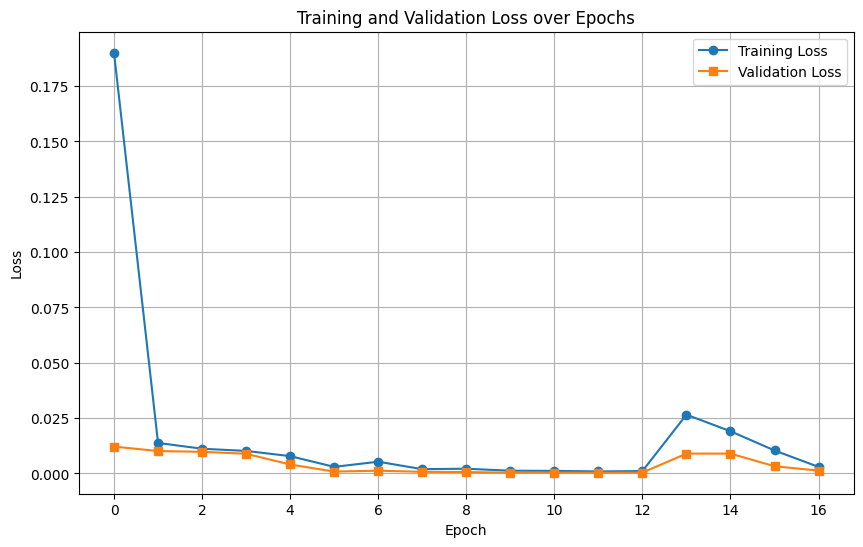

📉 Final Training Loss: 0.0030
📉 Final Validation Loss: 0.0013


In [ ]:
plot_losses(train_losses, val_losses, model=model, best_model_path="best_model.pth", device=device)


## **8.2 Running Inference on the Custom Object Detection Model**

After training your **custom object detection model**, evaluate its performance by passing test images through it. Select **at least three** key evaluation metrics to assess the model’s effectiveness. Potential metrics include:

### **Key Object Detection Metrics**
- **Precision**: Measures the proportion of correctly detected objects among all predicted objects.
- **Recall**: Represents the proportion of correctly detected objects out of all actual objects present in the image.
- **F1-Score**: The harmonic mean of Precision and Recall, balancing false positives and false negatives.
- **IoU (Intersection over Union)**: Computes the ratio of overlap between the predicted bounding box and the ground truth bounding box.
- **mAP (mean Average Precision)**: A widely used metric that calculates precision at multiple recall thresholds and averages them across all object classes.

### **Additional Model Performance Metrics**
- **Inference Speed**: Measure the time taken to process a single image.
- **Number of Parameters**: Count the total trainable parameters in your model.
- **Model Size**: Evaluate the storage space required for the trained model.


```python
def test_model()
  raise NotImplementedError

def calculate_iou()
  raise NotImplementedError

def calculate_map()
  raise NotImplementedError
```

In [ ]:
import torch
import time
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
def calculate_iou(box1, box2):
    """Compute Intersection over Union (IoU) between two bounding boxes."""
    x1 = torch.max(box1[0], box2[0])
    y1 = torch.max(box1[1], box2[1])
    x2 = torch.min(box1[2], box2[2])
    y2 = torch.min(box1[3], box2[3])

    intersection = torch.clamp(x2 - x1, min=0) * torch.clamp(y2 - y1, min=0)
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union = area1 + area2 - intersection

    return intersection / union if union > 0 else torch.tensor(0.0)

def calculate_map(pred_boxes, true_boxes, pred_labels, true_labels, iou_threshold=0.5):
    """Simple mean Average Precision (mAP) computation."""
    tp, fp, fn = 0, 0, 0
    for pb, pl, tb, tl in zip(pred_boxes, pred_labels, true_boxes, true_labels):
        iou = calculate_iou(pb, tb)
        if pl == tl and iou >= iou_threshold:
            tp += 1
        elif pl == tl and iou < iou_threshold:
            fn += 1
        else:
            fp += 1
    precision = tp / (tp + fp + 1e-6)
    recall = tp / (tp + fn + 1e-6)
    return 2 * (precision * recall) / (precision + recall + 1e-6)

def test_model(model, test_loader, device):
    model.eval()
    all_preds, all_labels = [], []
    pred_boxes_list, true_boxes_list = [], []

    total_time = 0
    with torch.no_grad():
        for images, targets in test_loader:
            images, targets = images.to(device), targets.to(device)

            start = time.time()
            cls_out, bbox_out = model(images)
            total_time += (time.time() - start)

            preds = torch.argmax(cls_out, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(targets[:, 0].cpu().numpy())

            pred_boxes_list.extend(bbox_out.cpu())
            true_boxes_list.extend(targets[:, 1:].cpu())

    # Metrics
    precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

    ious = [calculate_iou(pb, tb).item() for pb, tb in zip(pred_boxes_list, true_boxes_list)]
    mean_iou = np.mean(ious)
    mAP = calculate_map(pred_boxes_list, true_boxes_list, all_preds, all_labels)

    avg_inference_time = total_time / len(test_loader.dataset)
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    model_size_mb = sum(p.element_size() * p.numel() for p in model.parameters()) / (1024 ** 2)

    print("\n Evaluation Results:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Mean IoU: {mean_iou:.4f}")
    print(f"mAP: {mAP:.4f}")
    print(f"Inference Speed: {avg_inference_time:.6f} sec/image")
    print(f"Trainable Parameters: {num_params:,}")
    print(f"Model Size: {model_size_mb:.2f} MB")




In [ ]:
test_model(model, test_loader, device)


 Evaluation Results:
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Mean IoU: 0.0120
mAP: 0.0198
Inference Speed: 0.000773 sec/image
Trainable Parameters: 11,441,224
Model Size: 43.64 MB


## **8.3 Visualizing Model Predictions**
- Select a set of test images and display them with **predicted bounding boxes** overlaid.
- Compare predictions against the **ground truth bounding boxes** to visually assess model accuracy.
- Annotate each prediction with relevant metrics (Precision, Recall, IoU) to highlight how well the model performs.

For detailed tracking and logging, consider using **Weights and Biases (WandB)** or **TensorBoard** to visualize training progress, compare models, and gain deeper insights into your results.

In [ ]:
import matplotlib.patches as patches

class_names = ['Boy', 'Girl', 'Giraffe', 'Rooster']

def visualize_predictions(model, dataloader, device, num_images=5):
    model.eval()
    images_seen = 0

    with torch.no_grad():
        for images, targets in dataloader:
            images = images.to(device)
            class_logits, bboxes = model(images)

            preds = torch.argmax(class_logits, dim=1)
            bboxes = bboxes.cpu()
            preds = preds.cpu()
            targets = targets.cpu()

            batch_size = images.shape[0]
            for i in range(batch_size):
                if images_seen >= num_images:
                    return

                img = images[i].cpu().permute(1, 2, 0).numpy()
                img = (img * 0.5) + 0.5

                target = targets[i]
                pred_box = bboxes[i]
                gt_box = target[1:]

                H, W = img.shape[:2]

                gt_xc, gt_yc, gt_w, gt_h = gt_box.tolist()
                gt_xmin = (gt_xc - gt_w/2) * W
                gt_ymin = (gt_yc - gt_h/2) * H
                gt_w_px = gt_w * W
                gt_h_px = gt_h * H

                pr_xc, pr_yc, pr_w, pr_h = pred_box.tolist()
                pr_xmin = (pr_xc - pr_w/2) * W
                pr_ymin = (pr_yc - pr_h/2) * H
                pr_w_px = pr_w * W
                pr_h_px = pr_h * H

                fig, ax = plt.subplots(1)
                ax.imshow(img)
                ax.axis('off')


                ax.add_patch(patches.Rectangle(
                    (gt_xmin, gt_ymin), gt_w_px, gt_h_px,
                    linewidth=2, edgecolor='green', facecolor='none', label='Ground Truth'
                ))

                ax.add_patch(patches.Rectangle(
                    (pr_xmin, pr_ymin), pr_w_px, pr_h_px,
                    linewidth=2, edgecolor='red', facecolor='none', label='Prediction'
                ))

                cls_id = int(target[0].item())
                ax.set_title(f"GT: {class_names[cls_id]} | Pred: {class_names[preds[i]]}")
                ax.legend()

                plt.show()
                images_seen += 1

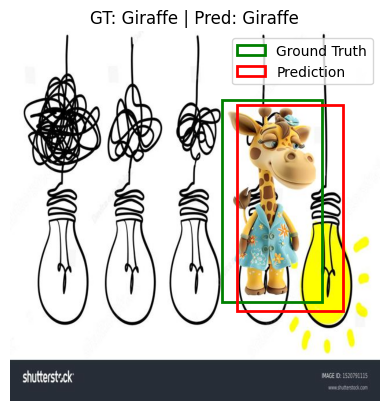

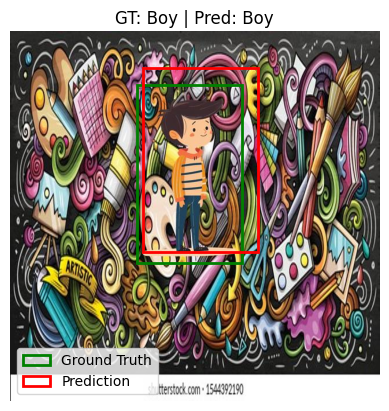

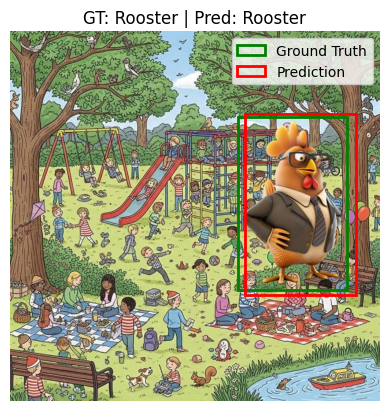

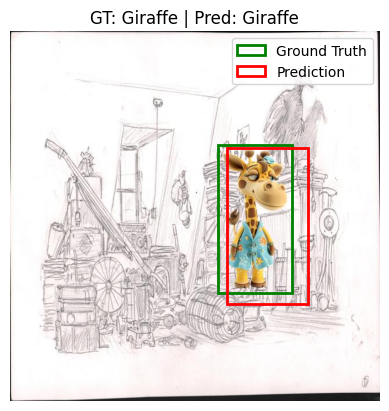

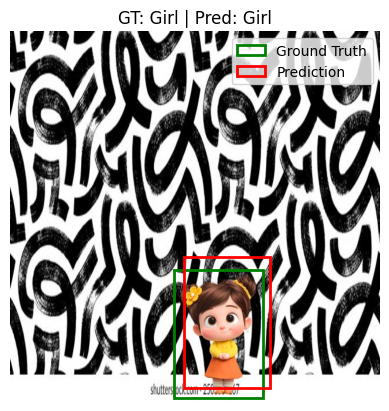

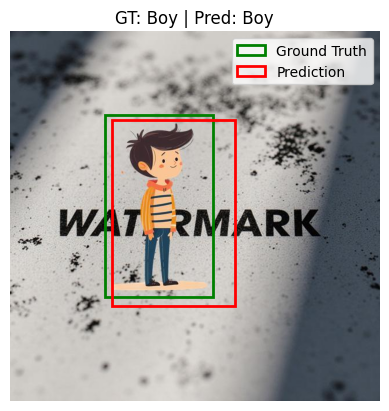

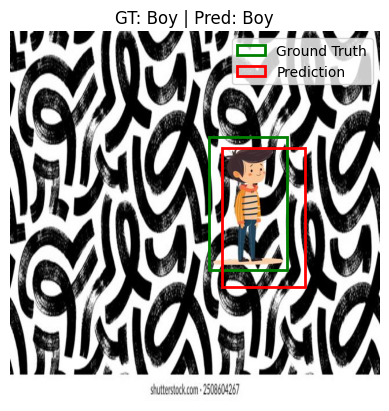

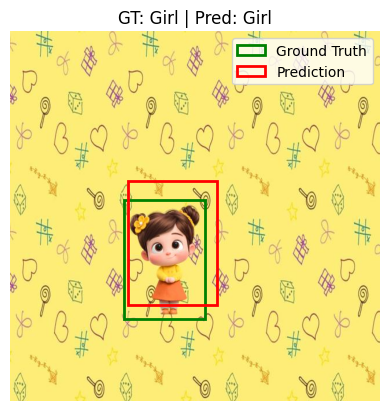

In [ ]:
visualize_predictions(model, test_loader, device, num_images=8)

## **9. Loading an Existing Object Detection Model (YOLOvX)**

You are free to select any YOLO model version available. We recommend referring to the **Ultralytics documentation** on object detection: [Ultralytics YOLO Docs](https://docs.ultralytics.com/tasks/detect/).

Training a YOLO model is straightforward and requires a properly formatted **`data.yaml`** file, which defines dataset paths and classes. Refer to the **official GitHub repository** for detailed instructions: [Ultralytics GitHub](https://github.com/ultralytics/ultralytics).

Once your dataset is prepared, you can initiate training directly from the command line using a simple command:

```bash
!yolo detect train data=datasets/data.yaml model=yolov11n.pt epochs=100 imgsz=640
```

A `data.yaml` might look something like this:
```python
with open('dataset/data.yaml', 'w') as f:
        f.write("path:  \ntrain: content/dataset/train/images \nval: content/dataset/val/images \ntest: content/dataset/test/images \n")
        f.write("nc: 3 \n")
        f.write("names:\n  0: wilma\n  1: waldo\n  2: wenda\n")
        f.write('\n')
f.close()
```

In [ ]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.4 MB/s eta 0:00:00


In [ ]:
%%writefile /content/data.yaml
train: /content/dataset/train/images
val: /content/dataset/val/images
test: /content/dataset/test/images

nc: 4
names: ['Boy', 'Girl', 'Giraffe', 'Rooster']

Writing /content/data.yaml


In [ ]:
!yolo detect train data=/content/data.yaml model=yolov8n.pt epochs=20 imgsz=640 batch=16 name=boy_girl_giraffe_rooster

Ultralytics 8.3.224 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=boy_girl_giraffe_rooster2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

## **10. Evaluating the YOLO Model**

Ensure that you **log and visualize training losses** and **evaluation metrics** throughout the training process. YOLO models typically provide verbose output by default, but you should also generate visualizations to track performance trends effectively.

Loaded training metrics from results.csv
   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  101.205         0.74916         1.57889         1.06255   
1      2  192.395         0.49359         0.66274         0.91662   
2      3  282.442         0.45050         0.47344         0.89649   
3      4  375.535         0.42602         0.40161         0.89296   
4      5  465.689         0.37367         0.34807         0.87938   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.99965                  1           0.99500   
1               0.99424                  1           0.99499   
2               0.99966                  1           0.99500   
3               0.99867                  1           0.99500   
4               0.99963                  1           0.99500   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.93923       0.33473       0.49132       0.79216  0.000415   
1  

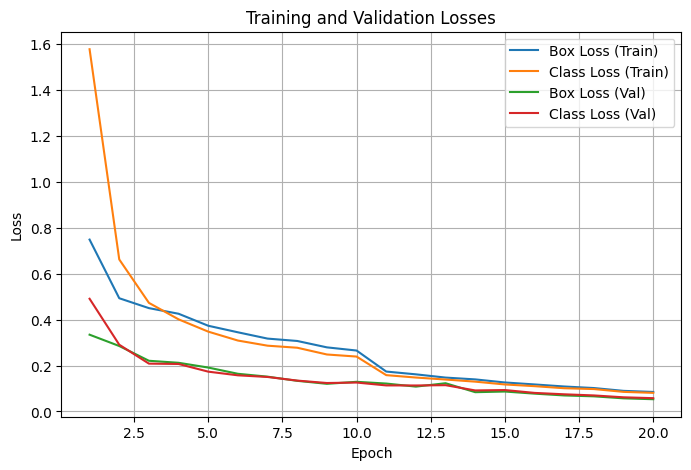

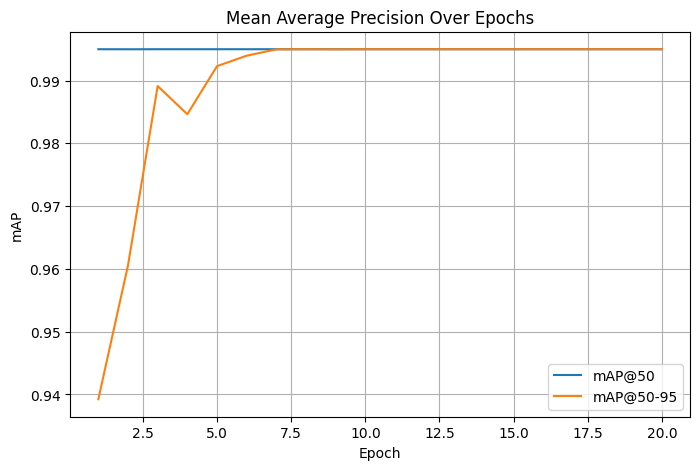

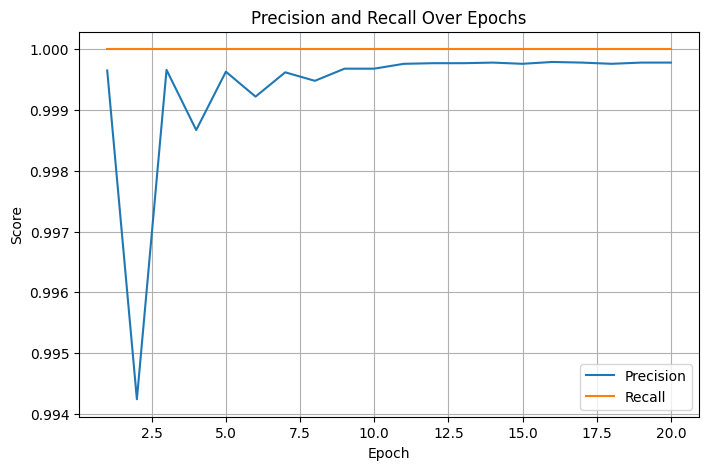

In [ ]:

results_dir = "/content/runs/detect/boy_girl_giraffe_rooster2"
results_csv = os.path.join(results_dir, "results.csv")

df = pd.read_csv(results_csv)
print("Loaded training metrics from results.csv")
print(df.head())

# Plot Training & Validation Losses
plt.figure(figsize=(8, 5))
plt.plot(df["epoch"], df["train/box_loss"], label="Box Loss (Train)")
plt.plot(df["epoch"], df["train/cls_loss"], label="Class Loss (Train)")
plt.plot(df["epoch"], df["val/box_loss"], label="Box Loss (Val)")
plt.plot(df["epoch"], df["val/cls_loss"], label="Class Loss (Val)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Losses")
plt.legend()
plt.grid(True)
plt.show()

# Plot mAP metrics
plt.figure(figsize=(8, 5))
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@50")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@50-95")
plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.title("Mean Average Precision Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

#Plot Precision & Recall
plt.figure(figsize=(8, 5))
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Precision and Recall Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


Please make sure to download your `.ipynb` file, and upload it to **Canvas** on time!

<img src="https://www.usatoday.com/gcdn/authoring/authoring-images/2023/08/25/USAT/70680172007-alertsm.png?crop=2099,1187,x0,y156" alt="1" border="0">



In [ ]:
from datetime import datetime, timedelta, timezone

deadline = datetime(2025, 11, 4, 23, 59, 0, tzinfo=timezone.utc)

def time_until_deadline():
    now = datetime.now(timezone.utc)
    remaining = deadline - now
    if remaining.total_seconds() <= 0:
        return "Time's up!"
    days = remaining.days
    hours, remainder = divmod(remaining.seconds, 3600)
    minutes, _ = divmod(remainder, 60)

    return f"{days} days, {hours} hours, {minutes} minutes"

print("Time left until submission:", time_until_deadline())

Time left until submission: 0 days, 23 hours, 45 minutes
